1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy  
Полученные значения должны быть равны.  
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,  
а затем с использованием функций из библиотек numpy и pandas.  

Оприеделим ковариацию величин с помощью элементарных функций:

$$cov_{XY} = M(XY) - M(X)M(Y)$$

In [9]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
d = {'Заработная плата':zp, 'Кредитный скоринг':ks}
df = pd.DataFrame(data=d)
df

,Заработная плата,Кредитный скоринг
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [20]:
n = len(df)
m_x, m_y = sum(df['Заработная плата'])/n, sum(df['Кредитный скоринг'])/n
m_x_np, m_y_np = df['Заработная плата'].mean(), df['Кредитный скоринг'].mean()

print('M(x)={}, M(y)={}'.format(m_x, m_y))
m_x == m_x_np, m_y == m_y_np

M(x)=101.4, M(y)=709.9


(True, True)

In [61]:
cov_xy = sum(df['Заработная плата']*df['Кредитный скоринг'])/n - (sum(df['Заработная плата'])/n)*(sum(df['Кредитный скоринг'])/n)
cov_xy == (df['Заработная плата']*df['Кредитный скоринг']).mean() - df['Заработная плата'].mean()*df['Кредитный скоринг'].mean()
cov_xy

9157.839999999997

In [58]:
#Определим теперь ковариацию средствами библиотеки Numpy:
cov_np = np.cov(df['Заработная плата'], df['Кредитный скоринг'], ddof=0)

print('cov={:.2f}'.format(cov_xy))
round(cov_np[0][1], 2) == round(cov_xy, 2)

cov=9157.84


True

Смещенные оценки ковариации, полученные расчетом элементарными функции и с применением библиотеки Numpy совпали   
Определим теперь значение коэффициэнта корреляции Пирсона для несмещенных значений величин выборки:

$$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

In [62]:
#Определим несмещенные значения характеристик выборки, ковариация:
cov_xy = sum(df['Заработная плата']*df['Кредитный скоринг'])/(n-1) - (sum(df['Заработная плата'])/(n-1))*(sum(df['Кредитный скоринг'])/(n))
cov_np = np.cov(df['Заработная плата'], df['Кредитный скоринг'], ddof=1)
print('cov={:.2f}'.format(cov_xy))
round(cov_np[0][1], 2) == round(cov_xy, 2)

cov=10175.38


True

In [73]:
#Стандартные отклонения величин Х и Y:
sigma_x = (sum((m_x - df['Заработная плата'])**2)/(n-1))**0.5
sigma_x_np = np.std(df['Заработная плата'], ddof=1)
sigma_y = (sum((m_y - df['Кредитный скоринг'])**2)/(n-1))**0.5
sigma_y_np = np.std(df['Кредитный скоринг'], ddof=1)
print('s(x)={:.2f}, s(y)={:.2f}'.format(sigma_x, sigma_y))
print(sigma_x == sigma_x_np, sigma_y == sigma_y_np)

s(x)=62.31, s(y)=184.00
True True


In [85]:
#Коэффициент корреляции Пирсона (несмещенная оценка)
r_xy = cov_xy/(sigma_x * sigma_y)
print('r_xy={:.2f}'.format(r_xy))
df.corr()

r_xy=0.89


,Заработная плата,Кредитный скоринг
Заработная плата,1.00000,0.88749
Кредитный скоринг,0.88749,1.00000


In [87]:
r_xy_np = np.corrcoef(df['Заработная плата'], df['Кредитный скоринг'], ddof=1)[0][1]
round(r_xy, 2) == round(r_xy_np, 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


True

#### Величины коэффициента корреляции Пирсона (несмещенная оценка), полученные расчетом элементарными функции и функциями библиотеки Numpy совпадают

2) Измерены значения IQ выборки студентов,  
обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.  
Известно, что в генеральной совокупности IQ распределен нормально.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  

In [89]:
iq = 131, 125, 115, 122, 131, 115, 107, 99, 125, 111
iq_dict = {'IQ':iq}
iq_df = pd.DataFrame(data=iq_dict)

,IQ
0,131
1,125
2,115
3,122
4,131
5,115
6,107
7,99
8,125
9,111


In [104]:
#Определим характеристики выборки
m_x = float(iq_df.mean()) # выборочное среднее значение
std_x = np.std(iq_df['IQ'], ddof=1) #несмещенная оценка стандартного отклонения для выборки
print('m_x={:.2f}, std_x={:.2f}'.format(m_x, std_x))

m_x=118.10, std_x=10.55


Ввиду того, что стандартное отклонение для генеральной совокупности нам не известно,  
для нахождения границ доверительного интервала
воспользумся t-критерием Стьюдента:

$$ \overline{x} - t_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq M(x) \leq \overline{x} + t_{\alpha/2}\frac{\sigma}{\sqrt{n}} $$

для n-1 = 9 и a/2 = 0.025 t = 2.262, тогда:

$$118.1 - 2.262\frac{10.55}{\sqrt{10}} \leq M(x) \leq 118.1 + 2.262\frac{10.55}{\sqrt{10}}$$

$$118.1 - 7.547 \leq M(x) \leq 118.1 + 7.547$$

$$110.55 \leq M(x) \leq 125.65$$

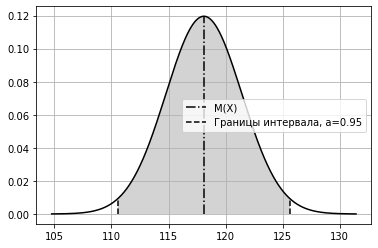

In [128]:
plot_distribution(118.1, 10.55/(10**0.5), 110.55, 125.65)

3) Известно, что рост футболистов в сборной распределен нормально  
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,  
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического  
ожидания с надежностью 0.95.  

Из условий задачи:

$ \alpha = 0.95$  
$ D = 25$  
$ \sigma = \sqrt{D} = 5$  
$ \overline{x} = 174.2$  
$ n = 27$

Тогда доверительный интервал будет равен:

$$ \overline{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq M(x) \leq \overline{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} $$

По таблице значений функции Лапласа для $\alpha/2 = 0.475$ находим: $z_{\alpha/2} = 1.96$

Тогда границы доверительного интервала составят:

$$ 174.2 - 1.96\frac{5}{\sqrt{27}} \leq M(x) \leq 174.2 + 1.96\frac{5}{\sqrt{27}} $$
$$ 174.2 - 1.96\frac{5}{5.196} \leq M(x) \leq 174.2 + 1.96\frac{5}{5.196} $$  

$$ 174.2 - 1.96 \cdot 0.962 \leq M(x) \leq 174.2 + 1.96 \cdot 0.962 $$  

$$ 174.2 - 1.886 \leq M(x) \leq 174.2 + 1.886 $$

$$ 172.31 \leq M(x) \leq 176.09 $$

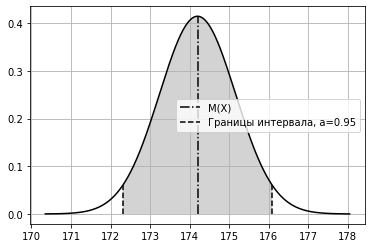

In [127]:
plot_distribution(174.2, 5/(27**0.5), 172.31, 176.09)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [107]:
def normal_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

In [126]:
def plot_distribution(mu, sigma, a=None, b=None, a2=None, b2=None):
    """Строит нормальное распределение,
    если необходимо то закрашивает участок под кривой [a, b]
    mu - математическое ожидание
    sigma - среднеквадратичное отклонение
    [a, b] - участок под кривой, площадь которого необходимо найти"""
    
    #координаты точек для построения кривой нормального распределения
    x = [i/1000 for i in range(int((mu - 4*sigma)*1000), int((mu + 4*sigma)*1000))]
    y = [normal_distribution(j, mu, sigma) for j in x]
    
    #координаты точек для прямой x = my
    x_mu = [mu]*2
    y_mu = min(y), max(y)
    
    #координаты для линий, которые ограничивают площадь под кривой [a, b]
    if a and b:
        x_ab = [i/1000 for i in range(int(a*1000), int((b)*1000))]
        y_ab = [normal_distribution(j, mu, sigma) for j in x_ab]
        #Дублируем крайние координаты по оси х, чтобы ограничить штрихуемую площадь вертикальными прямыми
        x_ab = x_ab[:1] + x_ab + x_ab[-1:]
        y_ab = [min(y),] + y_ab + [min(y),]
        
        #Координаты вертикальных прямых x=a и x=b
        x_a = [a]*2
        y_a = [min(y), normal_distribution(a, mu, sigma)]
        
        x_b = [b]*2
        y_b = [min(y), normal_distribution(b, mu, sigma)]
    
    if a2 and b2:
        x_ab2 = [i for i in range(a2, b2+1)]
        y_ab2 = [normal_distribution(j, mu, sigma) for j in x_ab2]
        #Дублируем крайние координаты по оси х, чтобы ограничить штрихуемую площадь вертикальными прямыми
        x_ab2 = x_ab2[:1] + x_ab2 + x_ab2[-1:]
        y_ab2 = [min(y),] + y_ab2 + [min(y),]
        
        #Координаты вертикальных прямых x=a и x=b
        x_a2 = [a2]*2
        y_a2 = [min(y), normal_distribution(a2, mu, sigma)]
        
        x_b2 = [b]*2
        y_b2 = [min(y), normal_distribution(b2, mu, sigma)]
        
    plt.figure(figsize =(6, 4))
    plt.plot(x, y, color = 'black')
    plt.plot(x_mu, y_mu, color='black', linestyle = 'dashdot', label='M(X)')
    #plt.title('Распределение роста взрослого населения города Х')
    #plt.xlabel('Рост')
    #plt.ylabel('Плотность вероятности')
    
    plt.grid()
    if a and b:
        plt.fill(x_ab, y_ab, 'lightgray')
        plt.plot(x_a, y_a, color='black', linestyle = 'dashed', label='Границы интервала, a=0.95')
        plt.plot(x_b, y_b, color='black', linestyle = 'dashed')
    if a2 and b2:
        plt.fill(x_ab2, y_ab2, 'lightgray')
        plt.plot(x_a2, y_a2, color='black', linestyle = 'dashed')
        plt.plot(x_b2, y_b2, color='black', linestyle = 'dashed')
    plt.legend()
    plt.show()